#### To determine_outcome function

In [1]:
def determine_outcome(pass_credits, defer_credits, fail_credits):
    total_credits = pass_credits + defer_credits + fail_credits
    
    if total_credits != 120:
        return "Invalid input. The total credits must sum to 120."
    
    if pass_credits == 120:
        return "Progress"
    elif pass_credits == 100:
        return "Progress (module trailer)"
    elif fail_credits >= 80:
        return "Exclude"
    else:
        return "Do not Progress – module retriever"

#### Input Field

In [4]:
try:
    pass_credits = int(input("Enter the number of pass credits: "))
    defer_credits = int(input("Enter the number of defer credits: "))
    fail_credits = int(input("Enter the number of fail credits: "))
except ValueError:
    print("Please enter valid integer values for credits.")


Enter the number of pass credits:  0
Enter the number of defer credits:  0
Enter the number of fail credits:  120


### Output the result

In [5]:
outcome = determine_outcome(pass_credits, defer_credits, fail_credits)
print(outcome)


Exclude


### Function to validate credits

In [6]:
def validate_credits(value):
    try:
        value = int(value)
        if value not in {0, 20, 40, 60, 80, 100, 120}:
            print("Out of range")
            return None
        return value
    except ValueError:
        print("Integer required")
        return None

### Function to collect input with validation

In [7]:
def get_validated_input(prompt):
    while True:
        value = input(prompt)
        result = validate_credits(value)
        if result is not None:
            return result

### Histogram function to visualize results

In [8]:
def display_histogram(progress_count, trailer_count, retriever_count, exclude_count):
    categories = ["Progress", "Progress (trailer)", "Module retriever", "Exclude"]
    counts = [progress_count, trailer_count, retriever_count, exclude_count]
    
    plt.bar(categories, counts, color=['green', 'blue', 'orange', 'red'])
    plt.xlabel('Progression Outcome')
    plt.ylabel('Number of Students')
    plt.title('Student Progression Outcomes')
    plt.show()

### Main function to handle multiple outcomes and results

In [10]:
import matplotlib.pyplot as plt

Enter the number of pass credits:  0
Enter the number of defer credits:  0
Enter the number of fail credits:  120


Exclude


Enter 'y' to input another student's data or 'q' to quit and view results:  q


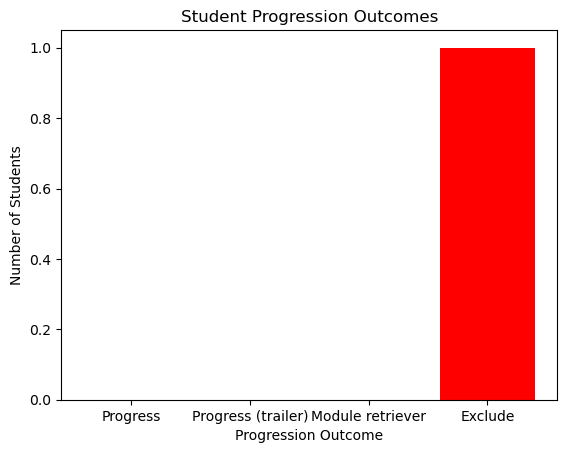

Total students: 1
Progress: 0, Trailer: 0, Retriever: 0, Exclude: 1


In [11]:
def main():
    progress_count = 0
    trailer_count = 0
    retriever_count = 0
    exclude_count = 0
    
    while True:
        # Get validated inputs
        pass_credits = get_validated_input("Enter the number of pass credits: ")
        defer_credits = get_validated_input("Enter the number of defer credits: ")
        fail_credits = get_validated_input("Enter the number of fail credits: ")
        
        # Determine outcome
        outcome = determine_outcome(pass_credits, defer_credits, fail_credits)
        print(outcome)
        
        # Update counts based on the outcome
        if outcome == "Progress":
            progress_count += 1
        elif outcome == "Progress (module trailer)":
            trailer_count += 1
        elif outcome == "Do not Progress – module retriever":
            retriever_count += 1
        elif outcome == "Exclude":
            exclude_count += 1

        # Prompt to continue or quit
        cont = input("Enter 'y' to input another student's data or 'q' to quit and view results: ")
        if cont.lower() == 'q':
            break

    # Display histogram
    display_histogram(progress_count, trailer_count, retriever_count, exclude_count)
    print(f"Total students: {progress_count + trailer_count + retriever_count + exclude_count}")
    print(f"Progress: {progress_count}, Trailer: {trailer_count}, Retriever: {retriever_count}, Exclude: {exclude_count}")

# Run the program
main()

### Part 2

In [13]:
# Function to determine the progression outcome
def get_progression_outcome(credits_pass, credits_defer, credits_fail):
    if credits_pass == 120:
        return "Progress"
    elif credits_pass == 100:
        return "Progress (module trailer)"
    elif credits_fail >= 80:
        return "Exclude"
    else:
        return "Module retriever"

# Function to add the progression data to the list
def add_to_list(progression_data, credits_pass, credits_defer, credits_fail):
    outcome = get_progression_outcome(credits_pass, credits_defer, credits_fail)
    progression_data.append([outcome, credits_pass, credits_defer, credits_fail])

# Function to print the progression data from the list
def print_progression_data(progression_data):
    print("Part 2:")
    for data in progression_data:
        outcome, credits_pass, credits_defer, credits_fail = data
        print(f"{outcome} - {credits_pass}, {credits_defer}, {credits_fail}")

# Function to save progression data to a text file
def save_to_file(progression_data, filename):
    with open(filename, 'w') as file:
        for data in progression_data:
            outcome, credits_pass, credits_defer, credits_fail = data
            file.write(f"{outcome} - {credits_pass}, {credits_defer}, {credits_fail}\n")

# Function to load progression data from a text file and print it
def load_and_print_from_file(filename):
    print("Part 3:")
    try:
        with open(filename, 'r') as file:
            for line in file:
                print(line.strip())
    except FileNotFoundError:
        print(f"Error: The file {filename} does not exist.")

# Function to collect input from the user
def collect_input():
    while True:
        try:
            credits_pass = int(input("Enter credits at pass (multiple of 20): "))
            credits_defer = int(input("Enter credits at defer (multiple of 20): "))
            credits_fail = int(input("Enter credits at fail (multiple of 20): "))

            if (credits_pass + credits_defer + credits_fail) != 120:
                print("Total credits must equal 120. Please try again.")
                continue

            if any(credit % 20 != 0 for credit in [credits_pass, credits_defer, credits_fail]):
                print("Each credit value must be a multiple of 20. Please try again.")
                continue

            return credits_pass, credits_defer, credits_fail
        except ValueError:
            print("Invalid input. Please enter numbers only.")

# Main program execution
def main():
    progression_data = []

    while True:
        # Collect progression data from user
        credits_pass, credits_defer, credits_fail = collect_input()
        
        # Add input data to the progression_data list
        add_to_list(progression_data, credits_pass, credits_defer, credits_fail)

        # Ask user if they want to input more data
        another_entry = input("Do you want to enter another set of data? (yes/no): ").strip().lower()
        if another_entry != 'yes':
            break

    # Part 2: Print the progression data
    print_progression_data(progression_data)

    # Part 3: Save to a text file and read from it
    filename = 'progression_data.txt'
    save_to_file(progression_data, filename)
    load_and_print_from_file(filename)

main()


Enter credits at pass (multiple of 20):  0
Enter credits at defer (multiple of 20):  0
Enter credits at fail (multiple of 20):  120
Do you want to enter another set of data? (yes/no):  no


Part 2:
Exclude - 0, 0, 120
Part 3:
Exclude - 0, 0, 120
